In [ ]:
can we use linear regression for classification?
many of answer -- no.
instead of using line we make use of sigmoid function.
A sigmoid function is  a mathematical function having a characterstic like "S" shaped curve

In [2]:
%matplotlib inline

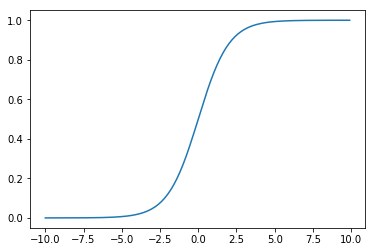

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-10,10,0.1)
sig = 1/(1 + np.power(np.e,-x))
plt.plot(x,sig)
plt.show()

In [ ]:
def sigmoid(z):
    return 1.0 /(np.exp(-z))

In [ ]:
This function returns a probability score between 0 and 1. In order to map this to a discrete value
we select a threshold value above which we will classify values as 1.
below which we will classify our values as 0.
p>=0.5, class = 1
p<0.5 , class = 0

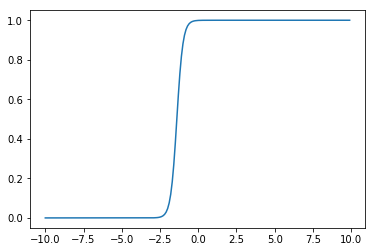

In [7]:
x = np.arange(-10,10,0.1)
lop = 5 * x + 7
conn_sig = 1/(1 + np.power(np.e,-lop))
plt.plot(x,conn_sig)
plt.show()

In [ ]:
x = mx + c.

In [ ]:
logistic|regression
logistic : we use logistic function or sigmoid function
regression: we used the linear regression equation to get the final prediction.

In [1]:
import seaborn as sns
df = sns.load_dataset("titanic")

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.drop(["parch","embarked","class","who","adult_male","deck","embark_town","alive","alone","fare"],axis = 1 , inplace = True)

In [ ]:
Target variable --- survived.
Feature -- pclass -- yes
           sex --- yes
           age -- yes
            sibsp are there on ship or not -- yes
            fare -- no
            class - no
            adult_male -- no
            

In [4]:
df.head()

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [5]:
import pandas as pd

In [6]:
gender = pd.get_dummies(df["sex"],drop_first = True)

In [7]:
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [8]:
type(gender)

pandas.core.frame.DataFrame

In [9]:
df.drop(["sex"],axis = 1,inplace = True)

In [10]:
df.head()

,survived,pclass,age,sibsp
0,0,3,22.0,1
1,1,1,38.0,1
2,1,3,26.0,0
3,1,1,35.0,1
4,0,3,35.0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
survived    891 non-null int64
pclass      891 non-null int64
age         714 non-null float64
sibsp       891 non-null int64
dtypes: float64(1), int64(3)
memory usage: 27.9 KB


In [11]:
new_df = pd.concat([df,gender],axis = 1)

In [12]:
new_df.head()

,survived,pclass,age,sibsp,male
0,0,3,22.0,1,1
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1


In [13]:
X = new_df.iloc[:,1:]

In [14]:
y = new_df.iloc[:,0]

In [15]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [16]:
X.head()

,pclass,age,sibsp,male
0,3,22.0,1,1
1,1,38.0,1,0
2,3,26.0,0,0
3,1,35.0,1,0
4,3,35.0,0,1


In [17]:
X.isna().sum()

pclass      0
age       177
sibsp       0
male        0
dtype: int64

In [43]:
X["age"].mean()

29.69911764705882

In [18]:
X["age"].fillna(29,inplace = True)

In [19]:
X.isna().sum()

pclass    0
age       0
sibsp     0
male      0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [23]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
model.score(x_test,y_test)

0.7653631284916201

In [25]:
from sklearn.svm import SVC
model1 = SVC()

In [26]:
model1.fit(x_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
model1.score(x_test,y_test)

0.8212290502793296

In [28]:
import time
%time model.fit(x_train,y_train)

Wall time: 3.99 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
%time model1.fit(x_train,y_train)

Wall time: 19.9 ms


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [31]:
%time log.fit(x_train,y_train)

Wall time: 213 ms


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
log.fit(x_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
y_pred = log.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)

In [54]:
conf_mat

array([[91, 14],
       [22, 52]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
Macro average: will compute the metric independently for each class and then take the average(treating all class equally)
Micro avg : will aggregate the contributions of all classes to compute average metric.

In [ ]:
class 1 : 1tp 1 fp
class2 : 10tp 90 fp
class3 : 1 tp 1 fp
class4: 1 tp and 1 fp

In [ ]:
precision = Tp/TP+FP , p(class1) = 0.5 , p(class2) =0.1 ,p(class3)= 0.5  ,p(class4)= 0.5

In [ ]:
macro avg : (0.5 + 0.5 + 0.5 + 0.1)/4 = 0.4

In [ ]:
micro avg = (1 + 10+ 1+ 1)/2 + 100 + 2 + 2 = 0.123

In [ ]:
Weighted avg : which class contribute to the average is weighted by relative number of examples
    or instances available for it.
In a multi-class classification , these three terms are preferebly used for 
class imbalance.
    

In [ ]:
2/106 = 0.0188 , 100/106 = 0.943

In [ ]:
0.018 * 0.5 + 0.943 * 0.1 + 0.018 * 0.5 + 0.018 * 0.5 = 0.123
weighted average of precision.